# Hong Kong  Kowloon Property Price Prediction

This project aims to predict property prices in Hong Kong using machine learning techniques. The dataset includes various features such as location, size, age of the property, and more.

## Table of Contents
1. Introduction
2. Extract Transform and Load Data
3. Exploratory Data Analysis
4. Feature Engineering
5. Train-Test Validation Split
6. Model Implementation
7. Hyperparameter Tuning
8. Final Model Evaluation
9. Predict by User Input

## Introduction
Overview Learn how companies like Zillow would predict the value of your property in Hong Kong. This project will build a model to predict the real estate sales price of a property based upon various historical features about the house and the sales transaction.

The dataset for this project includes various features that are relevant to predicting property prices in Hong Kong. These features typically include:

Location: The geographical area where the property is situated. This can significantly influence property prices due to factors like proximity to amenities, schools, and public transport.
Size: The total area of the property, usually measured in square feet or square meters. Larger properties generally have higher prices.
Age of the Property: The number of years since the property was built. Older properties might be cheaper due to wear and tear, while newer properties might be more expensive.
Other Features: Additional attributes such as the number of bedrooms, bathrooms, presence of a garden or balcony, floor level, and more.

These features are used to train machine learning models to predict the sales price of properties based on historical data. The goal is to create a reliable model that can help stakeholders make informed investment decisions by forecasting future property prices.

Objective of this tutorial is for stakeholders to make a profit from investing in and the eventual sale of invested properties. To do this, you need a solid property prediction model based on historical property transactions. To enable the prediction of future property prices from your prediction model compared against prevailing asking prices. So that the future sale of a property will bring in a nice profit.

## 2. Extract, Transform and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk   
import datetime
df = pd.read_csv('cleaned_data.csv')

df.head()

,Unnamed: 0,Date,Previous_Flag,District_ID,Estate_ID,Estate_Name,District_Name,Selling_Price,Hold_Time(days),Profit_Loss_Flag,%_Profit_Loss,Square_Floor_Area,Gross_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Quarter,Year
0,0,2020-11-27,1.0,79,2058,Bel Air Heights,Diamond Hill,10000000,6091,1,413,657.00,826.0,2,15221.0,12107.0,4,2020
1,1,2020-11-27,1.0,71,2712,Fa Yuen Plaza,Mong Kok,4280000,1080,1,22,214.00,347.0,1,20000.0,12334.0,4,2020
2,2,2020-11-27,1.0,78,3094,Caldecott Hill,Yau Yat Tsuen,11000000,2044,0,14,991.00,1282.0,7,11100.0,8580.0,4,2020
3,3,2020-11-27,0.0,57,5035,Pang Ching Court,Wong Tai Sin,4900000,0,-1,0,326.98,583.0,1,14986.0,8405.0,4,2020
4,4,2020-11-27,1.0,67,2564,Metro Harbour View,Tai Kok Tsui,7150000,4537,1,198,412.00,595.0,1,17354.0,12017.0,4,2020


In [2]:
df.isna().sum()

Unnamed: 0           0
Date                 0
Previous_Flag        0
District_ID          0
Estate_ID            0
Estate_Name          0
District_Name        0
Selling_Price        0
Hold_Time(days)      0
Profit_Loss_Flag     0
%_Profit_Loss        0
Square_Floor_Area    0
Gross_Floor_Area     0
Floor                0
Calc_SFA_Price       0
Calc_GFA_Price       0
Quarter              0
Year                 0
dtype: int64

In [3]:
# Reset the index
df = df.reset_index(drop=True)

# Drop the 'Unnamed: 0' column

# Select the columns that are of interest
df = df[['Date', 'District_Name', 'Estate_Name', 'Selling_Price', 'Hold_Time(days)', 'Square_Floor_Area', 'Floor', 'Calc_SFA_Price', 'Calc_GFA_Price']]

# Check the data types
df.dtypes

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Adding a 'Month' column, integer value 1-12
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Adding a 'Year' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

df.head()

,Date,District_Name,Estate_Name,Selling_Price,Hold_Time(days),Square_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Month,Year
0,2020-11-27,Diamond Hill,Bel Air Heights,10000000,6091,657.00,2,15221.0,12107.0,11,2020
1,2020-11-27,Mong Kok,Fa Yuen Plaza,4280000,1080,214.00,1,20000.0,12334.0,11,2020
2,2020-11-27,Yau Yat Tsuen,Caldecott Hill,11000000,2044,991.00,7,11100.0,8580.0,11,2020
3,2020-11-27,Wong Tai Sin,Pang Ching Court,4900000,0,326.98,1,14986.0,8405.0,11,2020
4,2020-11-27,Tai Kok Tsui,Metro Harbour View,7150000,4537,412.00,1,17354.0,12017.0,11,2020


In [4]:
# Check the data types
df.dtypes

Date                 datetime64[ns]
District_Name                object
Estate_Name                  object
Selling_Price                 int64
Hold_Time(days)               int64
Square_Floor_Area           float64
Floor                         int64
Calc_SFA_Price              float64
Calc_GFA_Price              float64
Month                         int32
Year                          int32
dtype: object

In [5]:
df.describe()

,Date,Selling_Price,Hold_Time(days),Square_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Month,Year
count,80000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,2017-09-10 04:46:34.680000256,7.581254e+06,2158.588650,521.582004,3.153987,14030.824688,11762.356650,6.537987,2017.190437
min,2014-10-27 00:00:00,5.000000e+04,0.000000,152.000000,0.000000,115.000000,115.000000,1.000000,2014.000000
25%,2016-04-20 00:00:00,3.916735e+06,0.000000,387.580000,1.000000,8994.000000,8249.000000,4.000000,2016.000000
50%,2017-08-09 12:00:00,5.550000e+06,1707.000000,473.000000,2.000000,12964.000000,10753.000000,6.000000,2017.000000
75%,2019-02-28 00:00:00,8.280000e+06,3349.000000,594.820000,5.000000,17016.000000,13977.000000,10.000000,2019.000000
max,2020-11-27 00:00:00,4.238000e+08,9067.000000,4414.000000,9.000000,349450.000000,235788.000000,12.000000,2020.000000
std,NaN,8.657835e+06,2132.808075,231.648927,2.469661,9793.036599,6835.514808,3.401794,1.763501


## 3. Overall Trend of Property Prices of Kowloon Districts

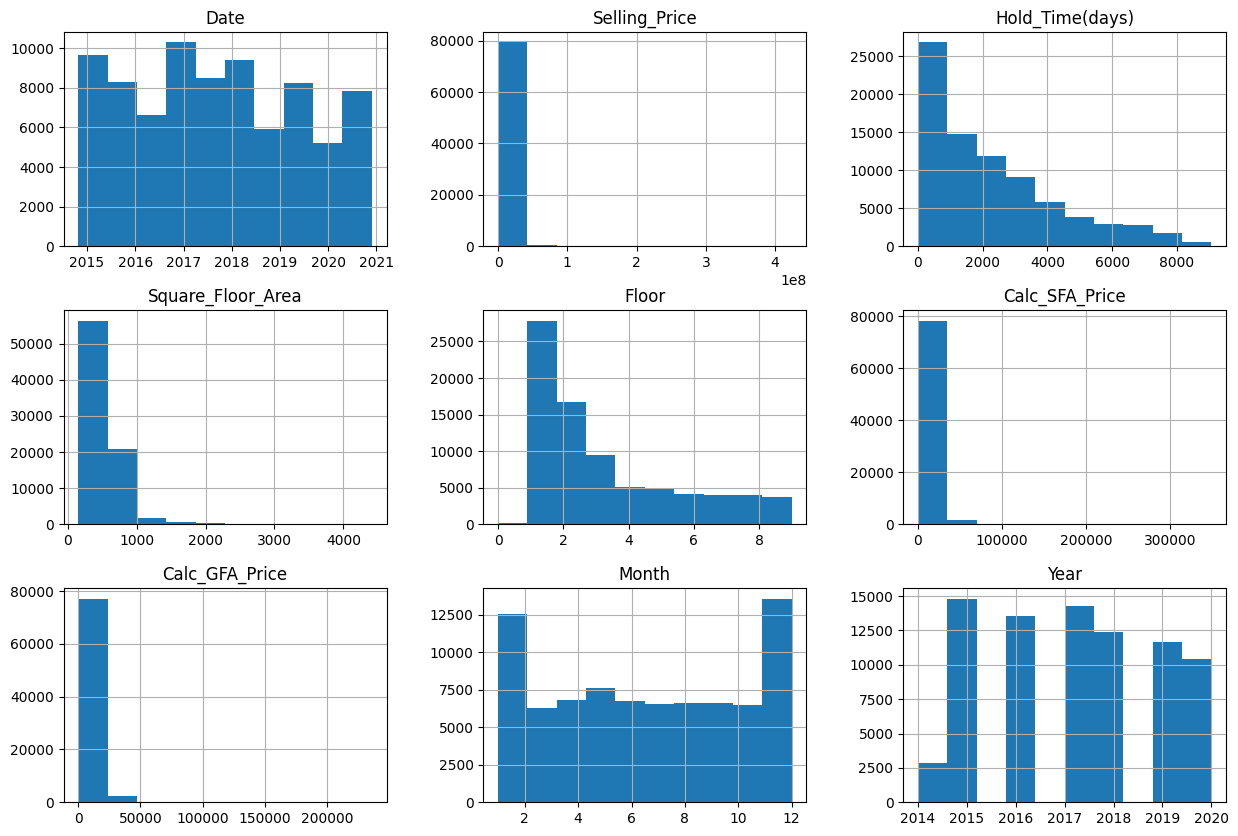

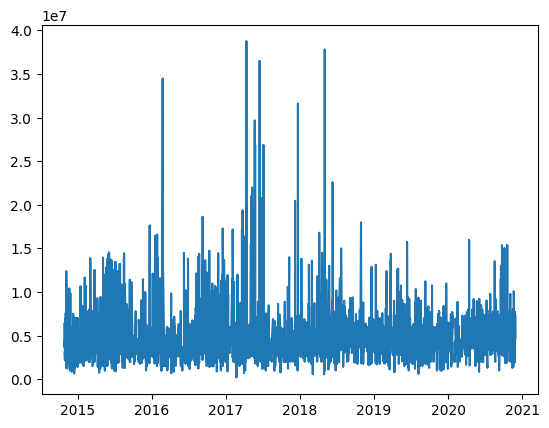

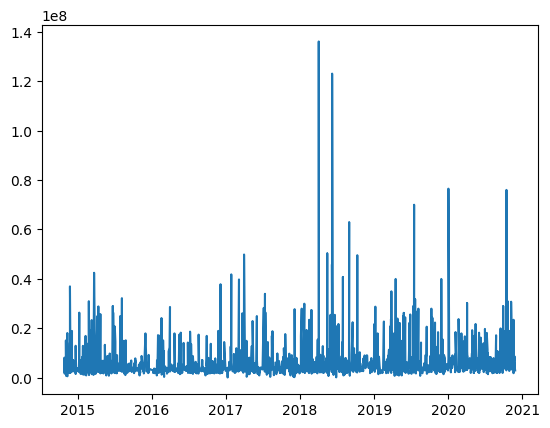

<Figure size 640x480 with 0 Axes>

In [6]:
df.hist(bins=10, figsize=(15, 10))
plt.show()
#clear plot
plt.clf()

# Plot line graph of each dsitrict selling price, each district in one graph, use mean
districts = ['Mong Kok', 'Yau Ma Tei']
for district in districts:
    df_district = df[df['District_Name'] == district]

    plt.plot(df_district['Date'], df_district['Selling_Price'], label=district)
    plt.show()
    plt.clf()


In [7]:
# Find monthly average unit price per district

numeric_cols = [ 'Selling_Price', 'Calc_SFA_Price', 'Calc_GFA_Price', 'Hold_Time(days)', 'Square_Floor_Area', 'Floor', 'Month', 'Year']

price_cols = ['Selling_Price', 'Calc_SFA_Price', 'Calc_GFA_Price']

monthly_average_unit_price_per_district = df.groupby(['District_Name', 'Month'])[price_cols].mean().round(1)

monthly_average_unit_price_per_district.columns = ['Average Selling Price', 'Average Unit Price (SFA)', 'Average Unit Price (GFA)']
monthly_average_unit_price_per_district

Average Selling Price  Average Unit Price (SFA)  \
District_Name  Month                                                    
Cheung Sha Wan 1                  5113788.3                   10717.7   
               2                  4000499.7                   11021.3   
               3                  4401265.3                   10332.4   
               4                  4584974.4                   10940.6   
               5                  4712702.8                   12007.7   
...                                     ...                       ...   
Yau Yat Tsuen  8                 13550233.8                   20578.9   
               9                 17493128.2                   24930.7   
               10                14320468.8                   20783.2   
               11                12912211.3                   18224.5   
               12                13301259.6                   19832.1   

                      Average Unit Price (GFA)  
District_Name  Month                            
Cheung Sha Wan 1                       10277.7  
               2                       10261.4  
               3                        9514.8  
               4                       10145.6  
               5                       10859.3  
...                                        ...  
Yau Yat Tsuen  8                       15589.8  
               9                       20990.6  
               10                      14845.8  
               11                      13498.9  
               12                      14248.5  

[384 rows x 3 columns]

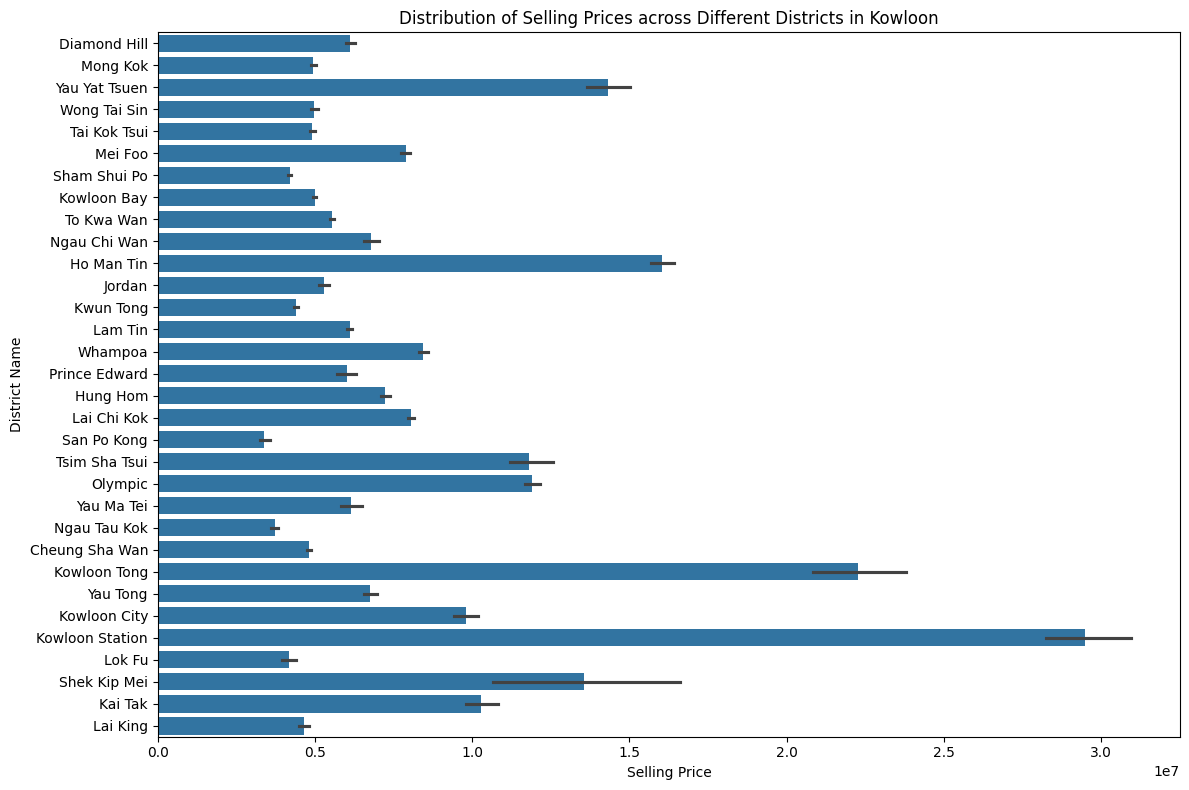

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(y='District_Name', x='Selling_Price', data=df)
plt.title('Distribution of Selling Prices across Different Districts in Kowloon')
plt.xlabel('Selling Price')
plt.ylabel('District Name')
plt.tight_layout()
plt.show()

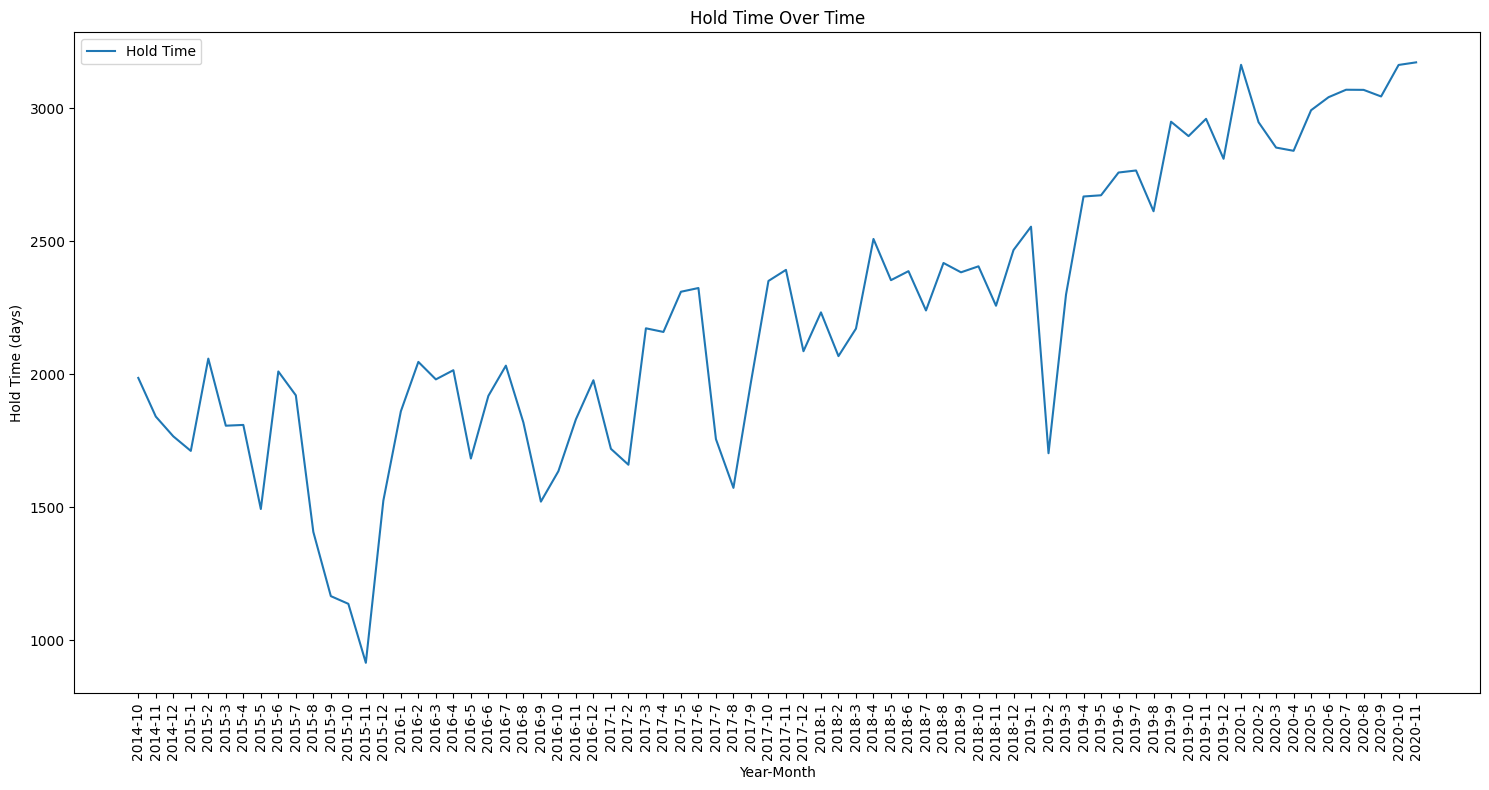

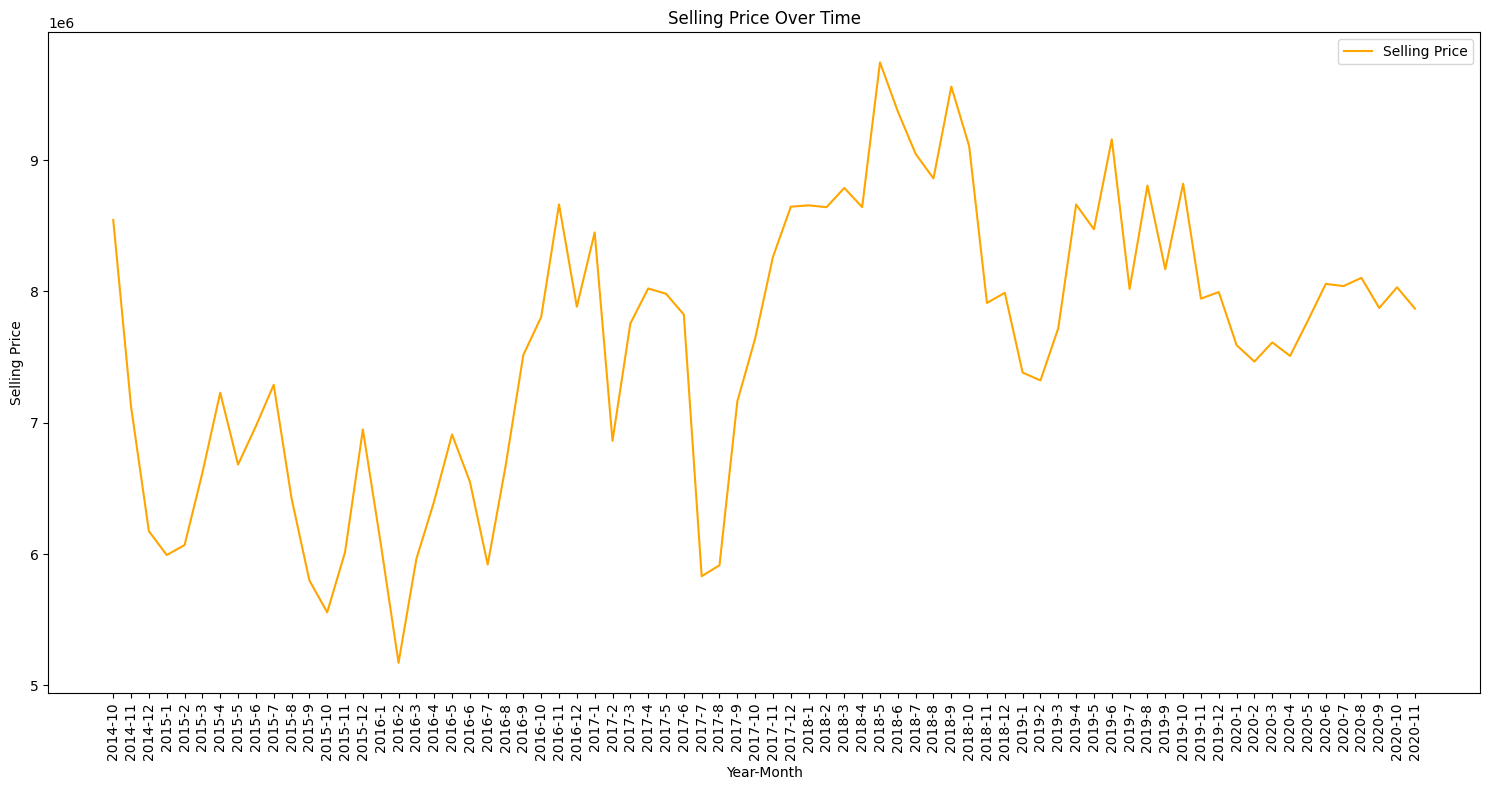

In [9]:
# Grouping by month and year, and calculating the mean hold time and selling price
df_monthly = df.groupby(['Year', 'Month']).agg({'Hold_Time(days)': 'mean', 'Selling_Price': 'mean'}).reset_index()
df_monthly['Year_Month'] = df_monthly['Year'].astype(str) + '-' + df_monthly['Month'].astype(str)

# Plotting the average hold time over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year_Month', y='Hold_Time(days)', data=df_monthly, label='Hold Time')
plt.title('Hold Time Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Hold Time (days)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting the average selling price over time
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year_Month', y='Selling_Price', data=df_monthly, color='orange', label='Selling Price')
plt.title('Selling Price Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Hong Kong has seen a large fall in the average amount of holding days in November 2015. Although the amount kept flactuating, it had an overall increase in the holding days with time. 

On the other hand, the average selling price started with a large fall then saw a few ups and down, with a maximum in the summer of 2018. The lowest average selling price was seen at the starting of 2016. Apart from that, it remained approximately similar.

## Analyse Relationship Between Fields and Selling Price

C:\Users\sebas\AppData\Local\Temp\ipykernel_66904\350712300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='District_Name', y='Selling_Price', data=df, showfliers=False, palette='viridis').set_title('Selling Price by District')


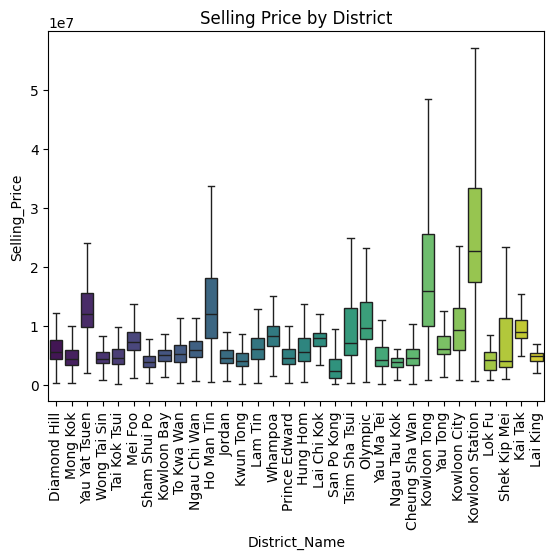

<Figure size 640x480 with 0 Axes>

In [10]:
target = df['Selling_Price']

# show the correlation between district and selling price, rotate the x-axis labels

sns.boxplot(x='District_Name', y='Selling_Price', data=df, showfliers=False, palette='viridis').set_title('Selling Price by District')
plt.xticks(rotation=90)
plt.show()                                            

# show the correlation between estate and selling price, rotate the x-axis labels
plt.clf()

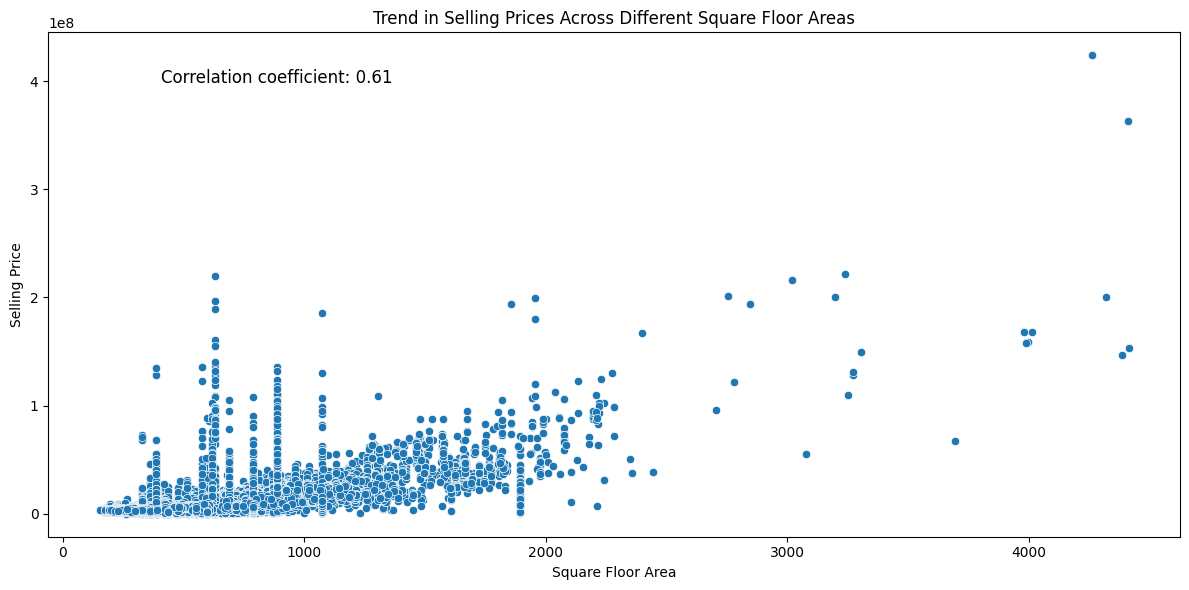

In [11]:
# Plotting the trend in selling prices across different square floor areas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Square_Floor_Area', y='Selling_Price', data=df)
plt.title('Trend in Selling Prices Across Different Square Floor Areas')
plt.xlabel('Square Floor Area')
plt.ylabel('Selling Price')
corr_coefficient = df['Square_Floor_Area'].corr(df['Selling_Price'])
plt.text(0.1, 0.9, f'Correlation coefficient: {corr_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()


With a correlation coefficient of 0.61 between the square floor area and selling price, we can conclude that there is a moderate positive correlation between the square floor area and selling price. In other words, as the square floor area increases, the selling price tends to increase.

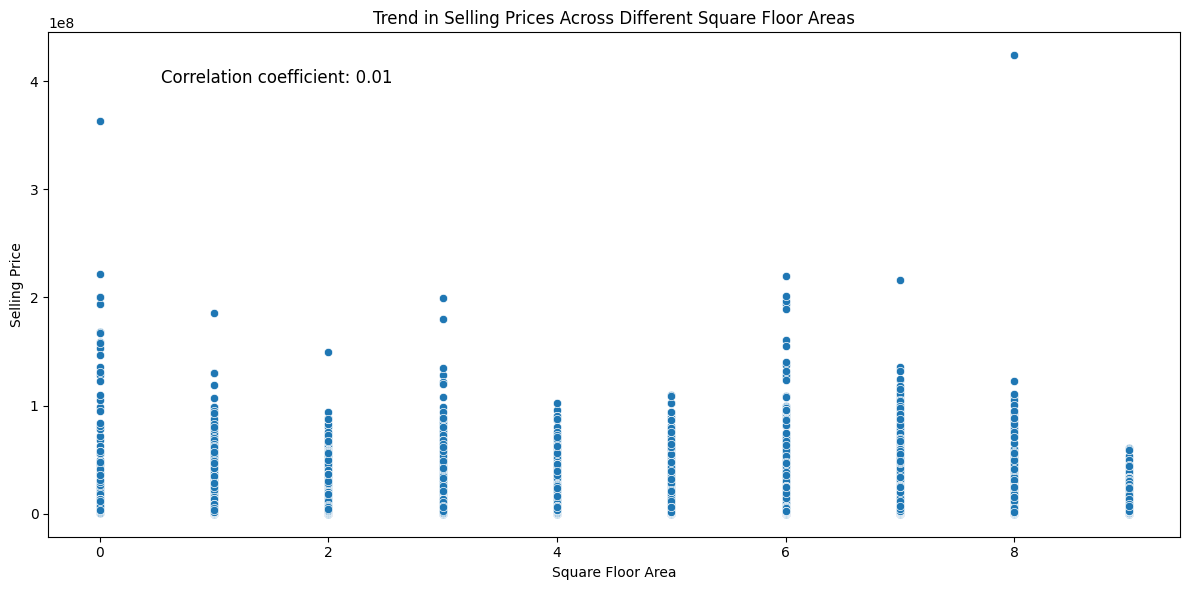

,Date,District_Name,Estate_Name,Selling_Price,Hold_Time(days),Square_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Month,Year
0,2020-11-27,Diamond Hill,Bel Air Heights,10000000,6091,657.00,2,15221.0,12107.0,11,2020
1,2020-11-27,Mong Kok,Fa Yuen Plaza,4280000,1080,214.00,1,20000.0,12334.0,11,2020
2,2020-11-27,Yau Yat Tsuen,Caldecott Hill,11000000,2044,991.00,7,11100.0,8580.0,11,2020
3,2020-11-27,Wong Tai Sin,Pang Ching Court,4900000,0,326.98,1,14986.0,8405.0,11,2020
4,2020-11-27,Tai Kok Tsui,Metro Harbour View,7150000,4537,412.00,1,17354.0,12017.0,11,2020


In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Floor', y='Selling_Price', data=df)
plt.title('Trend in Selling Prices Across Different Square Floor Areas')
plt.xlabel('Square Floor Area')
plt.ylabel('Selling Price')
corr_coefficient = df['Floor'].corr(df['Selling_Price'])
plt.text(0.1, 0.9, f'Correlation coefficient: {corr_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.tight_layout()
plt.show()

df.head()

## 4. Feature Engineering

In [13]:
# Pearson correlation coefficient, 
corr_matrix = df[numeric_cols].corr()
corr_matrix


,Selling_Price,Calc_SFA_Price,Calc_GFA_Price,Hold_Time(days),Square_Floor_Area,Floor,Month,Year
Selling_Price,1.000000,0.760359,0.656282,-0.015821,0.610219,0.012408,0.004267,0.071168
Calc_SFA_Price,0.760359,1.000000,0.784505,-0.043688,0.115947,-0.014403,0.012027,0.104431
Calc_GFA_Price,0.656282,0.784505,1.000000,-0.151864,0.168027,-0.028090,0.022706,0.102218
Hold_Time(days),-0.015821,-0.043688,-0.151864,1.000000,0.062353,0.008752,-0.017586,0.211539
Square_Floor_Area,0.610219,0.115947,0.168027,0.062353,1.000000,0.026061,-0.013027,0.019819
Floor,0.012408,-0.014403,-0.028090,0.008752,0.026061,1.000000,0.000045,0.001699
Month,0.004267,0.012027,0.022706,-0.017586,-0.013027,0.000045,1.000000,-0.170223
Year,0.071168,0.104431,0.102218,0.211539,0.019819,0.001699,-0.170223,1.000000


### Standardizing Numerical Columns

In [14]:
# Standardizing the numerical columns except for the target variable
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

In [15]:
df_scaled.head()

,Date,District_Name,Estate_Name,Selling_Price,Hold_Time(days),Square_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Month,Year
0,2020-11-27,Diamond Hill,Bel Air Heights,0.279373,1.843783,0.584587,-0.467268,0.121534,0.050420,1.311673,1.593183
1,2020-11-27,Mong Kok,Fa Yuen Plaza,-0.381305,-0.505716,-1.327802,-0.872185,0.609536,0.083629,1.311673,1.593183
2,2020-11-27,Yau Yat Tsuen,Caldecott Hill,0.394876,-0.053727,2.026433,1.557313,-0.299278,-0.465565,1.311673,1.593183
3,2020-11-27,Wong Tai Sin,Pang Ching Court,-0.309693,-1.012094,-0.840078,-0.872185,0.097537,-0.491167,1.311673,1.593183
4,2020-11-27,Tai Kok Tsui,Metro Harbour View,-0.049811,1.115162,-0.473055,-0.872185,0.339343,0.037253,1.311673,1.593183


### One Hot Encode Categorical Fields

In [16]:
# One hot encode the categorical columns
df_encoded = pd.get_dummies(df_scaled, columns=['District_Name', 'Estate_Name'])
df_encoded.head()

,Date,Selling_Price,Hold_Time(days),Square_Floor_Area,Floor,Calc_SFA_Price,Calc_GFA_Price,Month,Year,District_Name_Cheung Sha Wan,...,Estate_Name_Yuet Ming Building,Estate_Name_Yuet Wah Mansion,Estate_Name_Yuet Yiu Building,Estate_Name_Yuk Chuen Building,Estate_Name_Yuk Sing House,Estate_Name_Yun Fat Building,Estate_Name_Yun Kai Building,Estate_Name_Yunhan Building,Estate_Name_Zebrano,Estate_Name_i-home
0,2020-11-27,0.279373,1.843783,0.584587,-0.467268,0.121534,0.050420,1.311673,1.593183,False,...,False,False,False,False,False,False,False,False,False,False
1,2020-11-27,-0.381305,-0.505716,-1.327802,-0.872185,0.609536,0.083629,1.311673,1.593183,False,...,False,False,False,False,False,False,False,False,False,False
2,2020-11-27,0.394876,-0.053727,2.026433,1.557313,-0.299278,-0.465565,1.311673,1.593183,False,...,False,False,False,False,False,False,False,False,False,False
3,2020-11-27,-0.309693,-1.012094,-0.840078,-0.872185,0.097537,-0.491167,1.311673,1.593183,False,...,False,False,False,False,False,False,False,False,False,False
4,2020-11-27,-0.049811,1.115162,-0.473055,-0.872185,0.339343,0.037253,1.311673,1.593183,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_encoded.dtypes

Date                            datetime64[ns]
Selling_Price                          float64
Hold_Time(days)                        float64
Square_Floor_Area                      float64
Floor                                  float64
                                     ...      
Estate_Name_Yun Fat Building              bool
Estate_Name_Yun Kai Building              bool
Estate_Name_Yunhan Building               bool
Estate_Name_Zebrano                       bool
Estate_Name_i-home                        bool
Length: 2050, dtype: object

## 5. Train-Test Validation Split

In [18]:
df_encoded.drop(['Date'], axis=1, inplace=True)

In [19]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='Selling_Price')
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Implement SDG Regressor

In [20]:
# SDG regression model
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)

SGDRegressor(random_state=42)

### Score of SDG Regressor

In [21]:
sgd_reg.score(X_test, y_test)

0.8932870427247328

## 7. Hyperparameter Tuning

In [ ]:
# Tune the hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [1e-4, 1e-3, 1e-2],
    'penalty': ['l2', 'l1']
}

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

## 8. Final Model Evaluation

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, alpha=0.0001, penalty='l2')
sgd_reg.fit(X_train, y_train)

sgd_reg.score(X_test, y_test)

In [ ]:
X.columns

## 9. Predict Property Price by User Input

In [ ]:
# Predict the selling price by user input
def predict_selling_price(model, data):
    data.drop(['Estate_Name', 'District_Name'], axis=1, inplace=True)

    return float(model.predict(data).round(2))

# Change data to be a dictionary with the same keys as the columns in the dataframe, also handle booleam
def fill_missing_values(data):
    for key in X.columns:
        if key in numeric_cols:
            # scale the numerical columns, use mean for null fields
            if data[key] is None:
                data[key] = df[key].mean()
            else:
                data[key] = (data[key] - df[key].mean()) / df[key].std()
        else:
            if "District_Name_" in key:
                if key[14:] == data['District_Name']:
                    data[key] = True
                else:
                    data[key] = False
                    
            elif "Estate_Name_" in key:
                if key[12:] == data['Estate_Name']:
                    data[key] = True
                else:
                    data[key] = False
    return data

# User input, use average for null fields
data = {
    'Hold_Time(days)': 30,
    'Square_Floor_Area': 500,
    'Floor': 10,
    'Calc_SFA_Price': None,
    'Calc_GFA_Price': None,
    'Month': 5,
    'Year': 2026,
    'District_Name': 'Cheung Sha Wan',
    'Estate_Name': 'Yuet Wah Mansion'
}

data = fill_missing_values(data)
data = pd.DataFrame(data, index=[0])

predicted_price = predict_selling_price(sgd_reg, data)
print("Predicted Price:", predicted_price)

